# In this practice session, we will learn to code Linear Regression. 
# We will perform the following steps to build a simple regression model using the popular Salary dataset.

 
 
  - **Data Preprocessing**

    - Importing the libraries.
    - Importing dataset.
    - Dealing with the categorical variable.
    - Classifying dependent and independent variables.
    - Splitting the data into a training set and test set.
    - Feature scaling.
 

  -  **Linear Regression**

    - Create a Linear Regression.
    - Feed the training data to the regressor model.
    - Predicting the scores for the test set.
    - Using the RMSE to measure the performance.

# Load the Dependencies

In [1]:
import ipywidgets as widgets
from IPython.display import display

style = {'description_width': 'initial'}

In [2]:
#1 Importing essential libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Load the Dataset

In [3]:
#2 Importing the dataset

file_name = 'Salary_Data.csv'
dataset = pd.read_csv(file_name)

In [4]:
#Displaying the dataset
dataset.head(8)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0


In [5]:
print(f"Dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns.")

Dataset has 30 rows and 2 columns.


In [7]:
#Plotting the relation between salary and experience
wig_col = widgets.Dropdown(
                options=dataset.columns.tolist(),
                description='Choose a Column to Plot vs. Salary',
                disabled=False,
                layout=widgets.Layout(width='90%', height='40px'),
                style=style)

# Plot Variables

Dropdown(description='Choose a Column to Plot vs. Salary', layout=Layout(height='40px', width='90%'), options=…

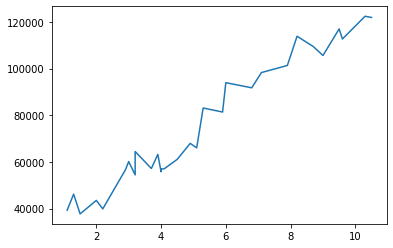

In [9]:
display(wig_col)
plt.plot(dataset[str(wig_col.value)], dataset['Salary']);

In [10]:
#3 classify dependent and independent variables
X = dataset.iloc[:,:-1].values  #independent variable YearsofExperience
y = dataset.iloc[:,-1].values  #dependent variable salary

In [11]:
print("\nIdependent Variable (Experience):\n\n", X[:5])
print("\nDependent Variable (Salary):\n\n", y[:5])


Idependent Variable (Experience):

 [[1.1]
 [1.3]
 [1.5]
 [2. ]
 [2.2]]

Dependent Variable (Salary):

 [39343. 46205. 37731. 43525. 39891.]


# Create Train and Test Sets

In [12]:
#4 Creating training set and testing set
from sklearn.model_selection import train_test_split
test_size = widgets.FloatSlider(min=0.01, max=0.6, value=0.2, description="Test Size :", tooltips=['Usually 20-30%'])
display(test_size)

FloatSlider(value=0.2, description='Test Size :', max=0.6, min=0.01)

In [13]:
#Divide the dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=test_size.value, random_state = 42) 

In [14]:
print("Training Set :\n----------------\n")
print("X = \n", X_train[:5])
print("y = \n", y_train[:5])

print("\n\nTest Set :\n----------------\n")
print("X = \n",X_test[:5])
print("y = \n", y_test[:5])

Training Set :
----------------

X = 
 [[10.3]
 [ 8.7]
 [ 4. ]
 [ 1.1]
 [ 2.2]]
y = 
 [122391. 109431.  56957.  39343.  39891.]


Test Set :
----------------

X = 
 [[9.6]
 [4.9]
 [8.2]
 [5.3]
 [3.2]]
y = 
 [112635.  67938. 113812.  83088.  64445.]


In [15]:
print(f"Shape of Training set is {X_train.shape}")
print(f"Shape of Testing set is {X_test.shape}")

Shape of Training set is (24, 1)
Shape of Testing set is (6, 1)


# Apply Linear Regression 

In [17]:
"""# II. Simple Linear Regressor """

#5 import SLR library
from sklearn.linear_model import LinearRegression

# configure params for the model.
fit_int_wig = widgets.ToggleButtons(
                options=['TRUE', 'FALSE'],
                description='Fit Intercept :',
                disabled=False,
                style=style,
                tooltips=['whether to calculate the intercept for this model. If set to False,\
                          no intercept will be used in calculations.'])

display(fit_int_wig)

norm_wig = widgets.ToggleButtons(
                value='FALSE',
                options=['TRUE', 'FALSE'],
                description='Normalize :',
                disabled=False,
                tooltips=['This parameter is ignored when fit_intercept is set to False. \
                            If True, the regressors X will be normalized before regression by \
                            subtracting the mean and dividing by the l2-norm.'],
                style=style)

display(norm_wig)

njobs_wig = widgets.Dropdown(options=[('One', 1), ('Two', 2), ('Three', 3), ('All Cores', -1)], 
                             description="Number of CPU Cores = ", style=style)

display(njobs_wig)

ToggleButtons(description='Fit Intercept :', options=('TRUE', 'FALSE'), style=ToggleButtonsStyle(description_w…

ToggleButtons(description='Normalize :', index=1, options=('TRUE', 'FALSE'), style=ToggleButtonsStyle(descript…

Dropdown(description='Number of CPU Cores = ', options=(('One', 1), ('Two', 2), ('Three', 3), ('All Cores', -1…

# Predict and Evaluate the Model 

In [18]:
#6 Train the Regressor with training set
regressor = LinearRegression(fit_intercept=fit_int_wig.value, normalize=norm_wig.value,
                            n_jobs=njobs_wig.value)

#fit the linear model
regressor.fit(X_train, y_train)

#7 predict the outcome of test sets
y_Pred = regressor.predict(X_test)
print("\nPredictions = ", y_Pred)


Predictions =  [115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]


In [20]:
#8 Claculating the Accuracy of the predictions
from sklearn import metrics
print("Prediction Accuracy = ", metrics.r2_score(y_test, y_Pred))

#9 Comparing Actual and Predicted Salaries for he test set
print("\nActual vs Predicted Salaries \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_Pred,
                         "Abs. Error" : np.abs(y_test - y_Pred)})

error_df

Prediction Accuracy =  0.9024461774180497

Actual vs Predicted Salaries 
------------------------------



,Actual,Predicted,Abs. Error
0,112635.0,115790.210113,3155.210113
1,67938.0,71498.278095,3560.278095
2,113812.0,102596.868661,11215.131339
3,83088.0,75267.804224,7820.195776
4,64445.0,55477.792045,8967.207955
5,57189.0,60189.699707,3000.699707


# Actual vs. Predicted 

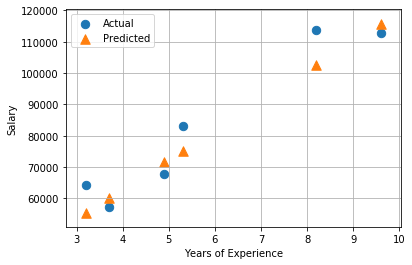

In [23]:
#Plotting Actual observation vs Predictions
plt.scatter(X_test,y_test, s = 70, label='Actual')
plt.scatter(X_test,y_Pred, s = 90, marker = '^', label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend();
plt.grid();
plt.show();


# Excercise 

In [24]:
# Evaluate different Regression metrics

from sklearn.metrics import mean_squared_error

In [25]:
## implement the rmse metric to calculate the RMSE(Root Mean Squared Error)


"""Hint : Replace y_true and y_pred with the right variables in the notebook.
          Also, don't forget to add the squared_root part to reach RMSE score."""

print(f"Root Mean Squared Error : {mean_squared_error(y_true=y_test, y_pred=y_Pred)}")



Root Mean Squared Error : 49830096.855908394
